In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
# load the dataset and remove dupilcate row
car_dataset = pd.read_csv('car data.csv')
car_dataset.drop_duplicates(inplace=True)

In [6]:
# print all col title
col = car_dataset.columns.to_list()
col

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

In [10]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [14]:
# convert string col into int col
label_encoder = LabelEncoder()
car_dataset['Fuel_Type'] = label_encoder.fit_transform(car_dataset['Fuel_Type'])
car_dataset['Seller_Type'] = label_encoder.fit_transform(car_dataset['Seller_Type'])
car_dataset['Transmission'] = label_encoder.fit_transform(car_dataset['Transmission'])
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [16]:
# define features (X) and target (y)
x = car_dataset.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
y = car_dataset['Selling_Price']
x, y

(     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
 0    2014           5.59       27000          2            0             1   
 1    2013           9.54       43000          1            0             1   
 2    2017           9.85        6900          2            0             1   
 3    2011           4.15        5200          2            0             1   
 4    2014           6.87       42450          1            0             1   
 ..    ...            ...         ...        ...          ...           ...   
 296  2016          11.60       33988          1            0             1   
 297  2015           5.90       60000          2            0             1   
 298  2009          11.00       87934          2            0             1   
 299  2017          12.50        9000          1            0             1   
 300  2016           5.90        5464          2            0             1   
 
      Owner  
 0        0  
 1        0  
 2      

In [18]:
# Split data into training & testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

In [20]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [38]:
# Predict on both train & test data using linear regression model
linear_train_prediction = linear_model.predict(x_train)
linear_test_prediction = linear_model.predict(x_test)

In [24]:
# Evaluate the linear regression model
linear_train_r2 = r2_score(y_train, linear_train_prediction)
linear_test_r2 = r2_score(y_test, linear_test_prediction)

linear_train_mse = mean_squared_error(y_train, linear_train_prediction)
linear_test_mse = mean_squared_error(y_test, linear_test_prediction)

In [26]:
print(f"Linear train prediction = r2 error {linear_train_r2:.4f}, mse {linear_train_mse:.4f}")
print(f"Linear test prediction = r2 error {linear_test_r2:.4f}, mse {linear_test_mse:.4f}")

Linear train prediction = r2 error 0.8771, mse 3.1508
Linear test prediction = r2 error 0.8563, mse 2.3672


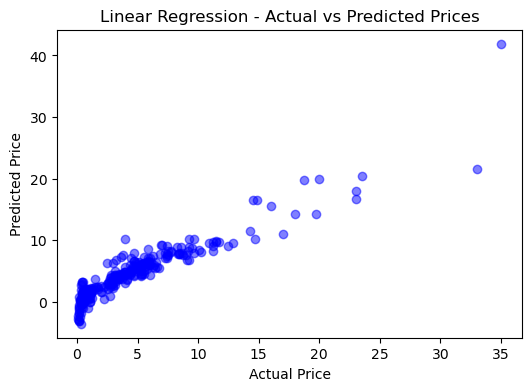

In [34]:
# Plot Actual vs Predicted Prices for Training Data*
plt.figure(figsize=(6, 4))
plt.scatter(y_train, linear_train_prediction, color='blue', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression - Actual vs Predicted Prices")
plt.show()

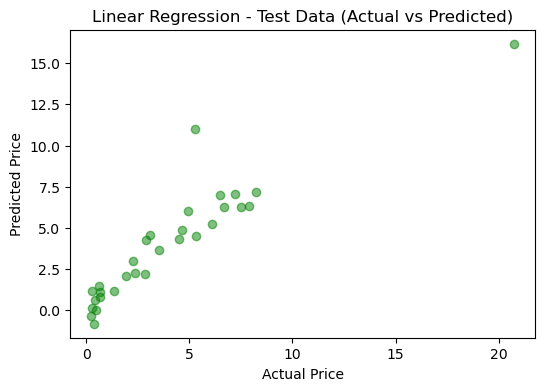

In [36]:
# Plot Actual vs Predicted Prices for Test Data
plt.figure(figsize=(6, 4))
plt.scatter(y_test, linear_test_prediction, color='green', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression - Test Data (Actual vs Predicted)")
plt.show()

In [32]:
# Lasso Regression Model
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

In [42]:
# Predict on both train & test data using lasso model
lasso_train_prediction = lasso_model.predict(x_train)
lasso_test_prediction = lasso_model.predict(x_test)

In [44]:
# # Evaluate the model using lasso
lasso_train_r2 = r2_score(y_train, lasso_train_prediction)
lasso_test_r2 = r2_score(y_test, lasso_test_prediction)

lasso_train_mse = mean_squared_error(y_train, lasso_train_prediction)
lasso_test_mse = mean_squared_error(y_test, lasso_test_prediction)

In [46]:
print(f"Lasso train prediction = r2 error {lasso_train_r2:.4f}, mse {lasso_train_mse:.4f}")
print(f"Lasso train prediction = r2 error {lasso_test_r2:.4f}, mse {lasso_test_mse:.4f}")

Lasso train prediction = r2 error 0.8428, mse 4.0304
Lasso train prediction = r2 error 0.7933, mse 3.4032


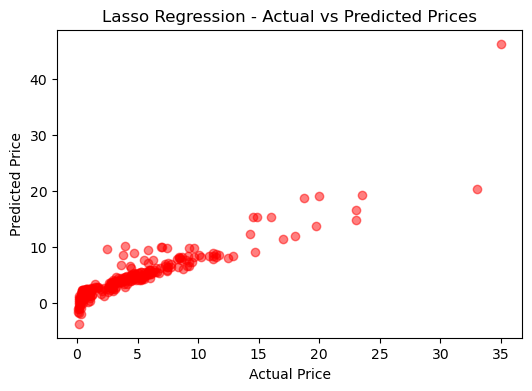

In [48]:
# Plot Actual vs Predicted Prices for Training Data
plt.figure(figsize=(6, 4))
plt.scatter(y_train, lasso_train_prediction, color='red', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression - Actual vs Predicted Prices")
plt.show()

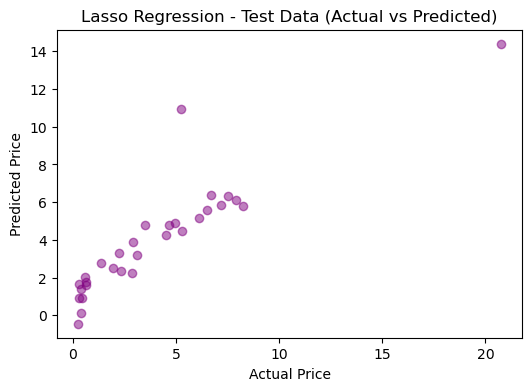

In [50]:
# Plot Actual vs Predicted Prices for Test Data
plt.figure(figsize=(6, 4))
plt.scatter(y_test, lasso_test_prediction, color='purple', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression - Test Data (Actual vs Predicted)")
plt.show()